Implementation of a word embedding in TensorFlow based on: https://towardsdatascience.com/learn-word2vec-by-implementing-it-in-tensorflow-45641adaf2ac

In [1]:
import numpy as np
import tensorflow as tf

/Users/franzi/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
text = 'He is the king . The king is royal . She is the royal  queen '
# convert to lower case
text_raw = text.lower()

In [3]:
# get all unique words from text and get rid of dots etc.

all_words = []

for w in text_raw.split():
    if w != '.':
        all_words.append(w)
        
unique_words = set(all_words)

In [4]:
# generating two dicts which give the integer of each word and vice versa

word2int = {}
int2word = {}

vocab_size = len(unique_words)

for ix, uw in enumerate(unique_words):
    word2int[uw] = ix
    int2word[ix] = uw
    
print word2int
print int2word

{'king': 0, 'is': 1, 'queen': 2, 'royal': 3, 'she': 4, 'the': 5, 'he': 6}
{0: 'king', 1: 'is', 2: 'queen', 3: 'royal', 4: 'she', 5: 'the', 6: 'he'}


In [5]:
# split the whole text into single sentences and then each sentence into single words

sentences = text_raw.split('.')

raw_sentences = []

for s in sentences:
    raw_sentences.append(s.split())
    
raw_sentences

[['he', 'is', 'the', 'king'],
 ['the', 'king', 'is', 'royal'],
 ['she', 'is', 'the', 'royal', 'queen']]

In [6]:
# split into text into pairs of words considering a specific window size

window_size = 2

ar = np.arange(4)

ids = np.array([-2, -1, 1, 2])

pairs_text = []
for raw_sentence in raw_sentences:
    pairs_sentence = []
    for ix, num in enumerate(raw_sentence):
        new_ids = ix + ids
        for ni in new_ids:
            if ix + ni > 0 and ni < len(raw_sentence):
                pairs_sentence.append([raw_sentence[ix], raw_sentence[ni]])
    pairs_text.append(pairs_sentence)

In [7]:
# transfer word pairs into integers with the help of the word2int-dict

word2int_text = []
for pt in pairs_text:
    word2int_sents = []
    for p in pt:
        word2int_sents.append([word2int[p[i]] for i in range(window_size)])
    word2int_text.append(word2int_sents)

In [8]:
def one_hot_encoding(vocab_size, ix):
    one_hot_vector = np.zeros(vocab_size)
    one_hot_vector[ix] = 1
    return one_hot_vector

In [9]:
# transfer all word-pairs into one-hot encoded vectors
word2int_text_all = np.concatenate(word2int_text)

x_train = np.vstack([one_hot_encoding(vocab_size, word2int_text_all[i][0]) for i in range(len(word2int_text_all))])
y_train = np.vstack([one_hot_encoding(vocab_size, word2int_text_all[i][1]) for i in range(len(word2int_text_all))])

In [10]:
# generate placeholders for x_train and y_train

x = tf.placeholder(tf.float32, shape=(None, vocab_size))
y = tf.placeholder(tf.float32, shape=(None, vocab_size))

In [11]:
# embedding

embedding_dim = 5

W1 = tf.Variable(tf.random_normal([vocab_size, embedding_dim]))

b1 = tf.Variable(tf.random_normal([embedding_dim])) #bias

# 1) matrix multiplication of x and W1 --> embedding of words in 5 dimensions
# 2) addind of bias
hidden_representation = tf.add(tf.matmul(x,W1), b1) 

In [12]:
# for the generation of predictions, transfer hidden representation back into space with the size of the vocab_size

W2 = tf.Variable(tf.random_normal([embedding_dim, vocab_size]))
b2 = tf.Variable(tf.random_normal([vocab_size]))

prediction  = tf.nn.softmax(tf.add(tf.matmul(hidden_representation, W2), b2))

In [13]:
# training of embedding

session = tf.Session()

init = tf.global_variables_initializer()

session.run(init)

#definition of loss function
cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y * tf.log(prediction), reduction_indices=[1])) #reduction_indices 
                                                                                                   #is the old name 
                                                                                                   #for axis
        
#definition of the training step
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy_loss)

# training for n iterations
n = 10000

for _ in range(n):
    session.run(train_step, feed_dict={x: x_train, y: y_train})
    print('loss is : ', session.run(cross_entropy_loss, feed_dict={x: x_train, y: y_train}))

('loss is : ', 3.9703948)
('loss is : ', 3.5823727)
('loss is : ', 3.2802007)
('loss is : ', 3.039695)
('loss is : ', 2.846749)
('loss is : ', 2.691787)
('loss is : ', 2.5675108)
('loss is : ', 2.4678676)
('loss is : ', 2.3876312)
('loss is : ', 2.322338)
('loss is : ', 2.2683399)
('loss is : ', 2.222803)
('loss is : ', 2.1836257)
('loss is : ', 2.149297)
('loss is : ', 2.118748)
('loss is : ', 2.0912228)
('loss is : ', 2.0661817)
('loss is : ', 2.04323)
('loss is : ', 2.0220716)
('loss is : ', 2.002476)
('loss is : ', 1.984259)
('loss is : ', 1.967269)
('loss is : ', 1.9513774)
('loss is : ', 1.9364752)
('loss is : ', 1.922466)
('loss is : ', 1.9092661)
('loss is : ', 1.8968015)
('loss is : ', 1.8850067)
('loss is : ', 1.8738222)
('loss is : ', 1.8631973)
('loss is : ', 1.853085)
('loss is : ', 1.8434439)
('loss is : ', 1.8342372)
('loss is : ', 1.8254316)
('loss is : ', 1.816997)
('loss is : ', 1.8089075)
('loss is : ', 1.8011385)
('loss is : ', 1.7936685)
('loss is : ', 1.7864779)
(

('loss is : ', 1.3875717)
('loss is : ', 1.387198)
('loss is : ', 1.3868268)
('loss is : ', 1.3864578)
('loss is : ', 1.3860914)
('loss is : ', 1.3857273)
('loss is : ', 1.3853655)
('loss is : ', 1.3850063)
('loss is : ', 1.3846494)
('loss is : ', 1.3842946)
('loss is : ', 1.3839425)
('loss is : ', 1.3835925)
('loss is : ', 1.3832449)
('loss is : ', 1.3828994)
('loss is : ', 1.3825566)
('loss is : ', 1.3822157)
('loss is : ', 1.3818773)
('loss is : ', 1.3815413)
('loss is : ', 1.3812072)
('loss is : ', 1.3808755)
('loss is : ', 1.3805457)
('loss is : ', 1.3802186)
('loss is : ', 1.3798935)
('loss is : ', 1.3795708)
('loss is : ', 1.3792502)
('loss is : ', 1.3789315)
('loss is : ', 1.3786154)
('loss is : ', 1.378301)
('loss is : ', 1.377989)
('loss is : ', 1.3776791)
('loss is : ', 1.3773713)
('loss is : ', 1.3770655)
('loss is : ', 1.376762)
('loss is : ', 1.3764607)
('loss is : ', 1.3761611)
('loss is : ', 1.375864)
('loss is : ', 1.3755687)
('loss is : ', 1.3752754)
('loss is : ', 1.

('loss is : ', 1.3375946)
('loss is : ', 1.3375523)
('loss is : ', 1.3375101)
('loss is : ', 1.337468)
('loss is : ', 1.3374262)
('loss is : ', 1.3373845)
('loss is : ', 1.3373429)
('loss is : ', 1.3373017)
('loss is : ', 1.3372605)
('loss is : ', 1.3372196)
('loss is : ', 1.3371787)
('loss is : ', 1.3371382)
('loss is : ', 1.3370978)
('loss is : ', 1.3370576)
('loss is : ', 1.3370174)
('loss is : ', 1.3369775)
('loss is : ', 1.3369379)
('loss is : ', 1.3368981)
('loss is : ', 1.3368587)
('loss is : ', 1.3368196)
('loss is : ', 1.3367804)
('loss is : ', 1.3367416)
('loss is : ', 1.336703)
('loss is : ', 1.3366643)
('loss is : ', 1.3366259)
('loss is : ', 1.3365877)
('loss is : ', 1.3365496)
('loss is : ', 1.3365117)
('loss is : ', 1.3364741)
('loss is : ', 1.3364364)
('loss is : ', 1.3363988)
('loss is : ', 1.3363616)
('loss is : ', 1.3363245)
('loss is : ', 1.3362875)
('loss is : ', 1.3362507)
('loss is : ', 1.3362141)
('loss is : ', 1.3361775)
('loss is : ', 1.3361412)
('loss is : ',

('loss is : ', 1.3290828)
('loss is : ', 1.3290702)
('loss is : ', 1.3290578)
('loss is : ', 1.3290453)
('loss is : ', 1.3290329)
('loss is : ', 1.3290205)
('loss is : ', 1.3290081)
('loss is : ', 1.328996)
('loss is : ', 1.3289834)
('loss is : ', 1.3289713)
('loss is : ', 1.3289591)
('loss is : ', 1.3289468)
('loss is : ', 1.3289347)
('loss is : ', 1.3289224)
('loss is : ', 1.3289104)
('loss is : ', 1.3288984)
('loss is : ', 1.3288864)
('loss is : ', 1.3288742)
('loss is : ', 1.3288623)
('loss is : ', 1.3288504)
('loss is : ', 1.3288383)
('loss is : ', 1.3288265)
('loss is : ', 1.3288146)
('loss is : ', 1.3288028)
('loss is : ', 1.328791)
('loss is : ', 1.3287792)
('loss is : ', 1.3287675)
('loss is : ', 1.3287559)
('loss is : ', 1.3287442)
('loss is : ', 1.3287325)
('loss is : ', 1.328721)
('loss is : ', 1.3287094)
('loss is : ', 1.3286977)
('loss is : ', 1.3286862)
('loss is : ', 1.3286748)
('loss is : ', 1.3286631)
('loss is : ', 1.3286518)
('loss is : ', 1.3286403)
('loss is : ', 

('loss is : ', 1.32623)
('loss is : ', 1.3262237)
('loss is : ', 1.3262178)
('loss is : ', 1.3262116)
('loss is : ', 1.3262055)
('loss is : ', 1.3261995)
('loss is : ', 1.3261935)
('loss is : ', 1.3261875)
('loss is : ', 1.3261813)
('loss is : ', 1.3261753)
('loss is : ', 1.3261694)
('loss is : ', 1.3261634)
('loss is : ', 1.3261575)
('loss is : ', 1.3261515)
('loss is : ', 1.3261454)
('loss is : ', 1.3261396)
('loss is : ', 1.3261337)
('loss is : ', 1.3261275)
('loss is : ', 1.3261217)
('loss is : ', 1.3261158)
('loss is : ', 1.32611)
('loss is : ', 1.3261042)
('loss is : ', 1.3260982)
('loss is : ', 1.3260925)
('loss is : ', 1.3260865)
('loss is : ', 1.3260808)
('loss is : ', 1.3260747)
('loss is : ', 1.3260689)
('loss is : ', 1.3260632)
('loss is : ', 1.3260576)
('loss is : ', 1.3260517)
('loss is : ', 1.3260459)
('loss is : ', 1.3260401)
('loss is : ', 1.3260343)
('loss is : ', 1.3260286)
('loss is : ', 1.3260229)
('loss is : ', 1.326017)
('loss is : ', 1.3260113)
('loss is : ', 1.

('loss is : ', 1.3244354)
('loss is : ', 1.3244324)
('loss is : ', 1.3244293)
('loss is : ', 1.3244259)
('loss is : ', 1.324423)
('loss is : ', 1.32442)
('loss is : ', 1.3244166)
('loss is : ', 1.3244137)
('loss is : ', 1.3244104)
('loss is : ', 1.3244075)
('loss is : ', 1.3244044)
('loss is : ', 1.3244011)
('loss is : ', 1.3243983)
('loss is : ', 1.3243952)
('loss is : ', 1.3243922)
('loss is : ', 1.324389)
('loss is : ', 1.3243859)
('loss is : ', 1.3243828)
('loss is : ', 1.3243799)
('loss is : ', 1.3243767)
('loss is : ', 1.3243737)
('loss is : ', 1.3243705)
('loss is : ', 1.3243676)
('loss is : ', 1.3243647)
('loss is : ', 1.3243614)
('loss is : ', 1.3243586)
('loss is : ', 1.3243555)
('loss is : ', 1.3243524)
('loss is : ', 1.3243494)
('loss is : ', 1.3243464)
('loss is : ', 1.3243436)
('loss is : ', 1.3243403)
('loss is : ', 1.3243375)
('loss is : ', 1.3243344)
('loss is : ', 1.3243314)
('loss is : ', 1.3243284)
('loss is : ', 1.3243254)
('loss is : ', 1.3243225)
('loss is : ', 1

('loss is : ', 1.3235581)
('loss is : ', 1.3235561)
('loss is : ', 1.323554)
('loss is : ', 1.323552)
('loss is : ', 1.32355)
('loss is : ', 1.3235481)
('loss is : ', 1.323546)
('loss is : ', 1.3235441)
('loss is : ', 1.3235421)
('loss is : ', 1.3235401)
('loss is : ', 1.3235381)
('loss is : ', 1.3235363)
('loss is : ', 1.3235343)
('loss is : ', 1.3235321)
('loss is : ', 1.3235303)
('loss is : ', 1.3235283)
('loss is : ', 1.3235263)
('loss is : ', 1.3235242)
('loss is : ', 1.3235224)
('loss is : ', 1.3235204)
('loss is : ', 1.3235185)
('loss is : ', 1.3235165)
('loss is : ', 1.3235146)
('loss is : ', 1.3235126)
('loss is : ', 1.3235106)
('loss is : ', 1.3235087)
('loss is : ', 1.3235067)
('loss is : ', 1.3235049)
('loss is : ', 1.3235029)
('loss is : ', 1.3235009)
('loss is : ', 1.323499)
('loss is : ', 1.3234969)
('loss is : ', 1.323495)
('loss is : ', 1.3234931)
('loss is : ', 1.3234912)
('loss is : ', 1.3234893)
('loss is : ', 1.3234873)
('loss is : ', 1.3234855)
('loss is : ', 1.32

('loss is : ', 1.322978)
('loss is : ', 1.3229766)
('loss is : ', 1.3229753)
('loss is : ', 1.322974)
('loss is : ', 1.3229724)
('loss is : ', 1.3229712)
('loss is : ', 1.3229697)
('loss is : ', 1.3229684)
('loss is : ', 1.3229668)
('loss is : ', 1.3229656)
('loss is : ', 1.3229644)
('loss is : ', 1.3229628)
('loss is : ', 1.3229616)
('loss is : ', 1.3229601)
('loss is : ', 1.3229588)
('loss is : ', 1.3229574)
('loss is : ', 1.3229561)
('loss is : ', 1.3229548)
('loss is : ', 1.3229533)
('loss is : ', 1.322952)
('loss is : ', 1.3229506)
('loss is : ', 1.3229494)
('loss is : ', 1.322948)
('loss is : ', 1.3229465)
('loss is : ', 1.3229452)
('loss is : ', 1.3229439)
('loss is : ', 1.3229426)
('loss is : ', 1.3229412)
('loss is : ', 1.32294)
('loss is : ', 1.3229384)
('loss is : ', 1.3229371)
('loss is : ', 1.3229359)
('loss is : ', 1.3229345)
('loss is : ', 1.3229333)
('loss is : ', 1.3229319)
('loss is : ', 1.3229305)
('loss is : ', 1.3229293)
('loss is : ', 1.322928)
('loss is : ', 1.32

('loss is : ', 1.3225759)
('loss is : ', 1.3225749)
('loss is : ', 1.3225737)
('loss is : ', 1.3225727)
('loss is : ', 1.3225718)
('loss is : ', 1.3225707)
('loss is : ', 1.3225698)
('loss is : ', 1.3225688)
('loss is : ', 1.3225678)
('loss is : ', 1.3225669)
('loss is : ', 1.3225658)
('loss is : ', 1.3225648)
('loss is : ', 1.3225639)
('loss is : ', 1.3225628)
('loss is : ', 1.3225619)
('loss is : ', 1.3225608)
('loss is : ', 1.3225598)
('loss is : ', 1.3225588)
('loss is : ', 1.3225578)
('loss is : ', 1.3225567)
('loss is : ', 1.3225559)
('loss is : ', 1.3225548)
('loss is : ', 1.3225539)
('loss is : ', 1.3225528)
('loss is : ', 1.3225518)
('loss is : ', 1.3225508)
('loss is : ', 1.3225499)
('loss is : ', 1.3225489)
('loss is : ', 1.322548)
('loss is : ', 1.322547)
('loss is : ', 1.322546)
('loss is : ', 1.322545)
('loss is : ', 1.322544)
('loss is : ', 1.322543)
('loss is : ', 1.322542)
('loss is : ', 1.3225412)
('loss is : ', 1.3225402)
('loss is : ', 1.3225392)
('loss is : ', 1.32

('loss is : ', 1.3222512)
('loss is : ', 1.3222504)
('loss is : ', 1.3222497)
('loss is : ', 1.3222488)
('loss is : ', 1.3222481)
('loss is : ', 1.3222474)
('loss is : ', 1.3222467)
('loss is : ', 1.3222458)
('loss is : ', 1.3222451)
('loss is : ', 1.3222445)
('loss is : ', 1.3222437)
('loss is : ', 1.3222431)
('loss is : ', 1.3222421)
('loss is : ', 1.3222415)
('loss is : ', 1.3222407)
('loss is : ', 1.3222399)
('loss is : ', 1.3222393)
('loss is : ', 1.3222384)
('loss is : ', 1.3222377)
('loss is : ', 1.3222371)
('loss is : ', 1.3222362)
('loss is : ', 1.3222355)
('loss is : ', 1.3222347)
('loss is : ', 1.322234)
('loss is : ', 1.3222333)
('loss is : ', 1.3222325)
('loss is : ', 1.3222319)
('loss is : ', 1.322231)
('loss is : ', 1.3222303)
('loss is : ', 1.3222297)
('loss is : ', 1.3222289)
('loss is : ', 1.3222281)
('loss is : ', 1.3222275)
('loss is : ', 1.3222268)
('loss is : ', 1.322226)
('loss is : ', 1.3222251)
('loss is : ', 1.3222245)
('loss is : ', 1.3222238)
('loss is : ', 

('loss is : ', 1.3219997)
('loss is : ', 1.3219992)
('loss is : ', 1.3219986)
('loss is : ', 1.3219981)
('loss is : ', 1.3219975)
('loss is : ', 1.3219968)
('loss is : ', 1.3219963)
('loss is : ', 1.3219957)
('loss is : ', 1.3219953)
('loss is : ', 1.3219945)
('loss is : ', 1.321994)
('loss is : ', 1.3219936)
('loss is : ', 1.321993)
('loss is : ', 1.3219923)
('loss is : ', 1.3219918)
('loss is : ', 1.3219912)
('loss is : ', 1.3219907)
('loss is : ', 1.3219901)
('loss is : ', 1.3219898)
('loss is : ', 1.3219889)
('loss is : ', 1.3219883)
('loss is : ', 1.3219879)
('loss is : ', 1.3219874)
('loss is : ', 1.3219869)
('loss is : ', 1.3219862)
('loss is : ', 1.3219856)
('loss is : ', 1.3219851)
('loss is : ', 1.3219844)
('loss is : ', 1.3219839)
('loss is : ', 1.3219833)
('loss is : ', 1.3219827)
('loss is : ', 1.3219824)
('loss is : ', 1.3219818)
('loss is : ', 1.3219811)
('loss is : ', 1.3219806)
('loss is : ', 1.32198)
('loss is : ', 1.3219795)
('loss is : ', 1.3219789)
('loss is : ', 1

('loss is : ', 1.3218224)
('loss is : ', 1.3218219)
('loss is : ', 1.3218215)
('loss is : ', 1.3218211)
('loss is : ', 1.3218206)
('loss is : ', 1.3218203)
('loss is : ', 1.3218198)
('loss is : ', 1.3218193)
('loss is : ', 1.3218187)
('loss is : ', 1.3218184)
('loss is : ', 1.321818)
('loss is : ', 1.3218175)
('loss is : ', 1.321817)
('loss is : ', 1.3218164)
('loss is : ', 1.3218162)
('loss is : ', 1.3218156)
('loss is : ', 1.3218151)
('loss is : ', 1.3218147)
('loss is : ', 1.3218144)
('loss is : ', 1.3218137)
('loss is : ', 1.3218133)
('loss is : ', 1.3218129)
('loss is : ', 1.3218125)
('loss is : ', 1.321812)
('loss is : ', 1.3218116)
('loss is : ', 1.321811)
('loss is : ', 1.3218107)
('loss is : ', 1.3218101)
('loss is : ', 1.3218098)
('loss is : ', 1.3218093)
('loss is : ', 1.3218088)
('loss is : ', 1.3218083)
('loss is : ', 1.3218081)
('loss is : ', 1.3218075)
('loss is : ', 1.321807)
('loss is : ', 1.3218066)
('loss is : ', 1.3218062)
('loss is : ', 1.3218056)
('loss is : ', 1.

('loss is : ', 1.3216865)
('loss is : ', 1.3216861)
('loss is : ', 1.3216858)
('loss is : ', 1.3216853)
('loss is : ', 1.321685)
('loss is : ', 1.3216846)
('loss is : ', 1.3216842)
('loss is : ', 1.3216839)
('loss is : ', 1.3216835)
('loss is : ', 1.321683)
('loss is : ', 1.3216828)
('loss is : ', 1.3216823)
('loss is : ', 1.321682)
('loss is : ', 1.3216816)
('loss is : ', 1.3216813)
('loss is : ', 1.3216809)
('loss is : ', 1.3216805)
('loss is : ', 1.32168)
('loss is : ', 1.3216797)
('loss is : ', 1.3216792)
('loss is : ', 1.321679)
('loss is : ', 1.3216788)
('loss is : ', 1.3216782)
('loss is : ', 1.3216778)
('loss is : ', 1.3216773)
('loss is : ', 1.3216772)
('loss is : ', 1.3216767)
('loss is : ', 1.3216764)
('loss is : ', 1.321676)
('loss is : ', 1.3216755)
('loss is : ', 1.3216753)
('loss is : ', 1.321675)
('loss is : ', 1.3216746)
('loss is : ', 1.3216741)
('loss is : ', 1.3216736)
('loss is : ', 1.3216734)
('loss is : ', 1.321673)
('loss is : ', 1.3216726)
('loss is : ', 1.3216

('loss is : ', 1.3215564)
('loss is : ', 1.3215559)
('loss is : ', 1.3215556)
('loss is : ', 1.3215553)
('loss is : ', 1.321555)
('loss is : ', 1.3215549)
('loss is : ', 1.3215544)
('loss is : ', 1.3215541)
('loss is : ', 1.3215537)
('loss is : ', 1.3215536)
('loss is : ', 1.3215532)
('loss is : ', 1.3215529)
('loss is : ', 1.3215526)
('loss is : ', 1.3215523)
('loss is : ', 1.321552)
('loss is : ', 1.3215517)
('loss is : ', 1.3215513)
('loss is : ', 1.3215511)
('loss is : ', 1.3215507)
('loss is : ', 1.3215504)
('loss is : ', 1.32155)
('loss is : ', 1.3215498)
('loss is : ', 1.3215494)
('loss is : ', 1.3215492)
('loss is : ', 1.321549)
('loss is : ', 1.3215486)
('loss is : ', 1.3215482)
('loss is : ', 1.321548)
('loss is : ', 1.3215475)
('loss is : ', 1.3215474)
('loss is : ', 1.321547)
('loss is : ', 1.3215467)
('loss is : ', 1.3215464)
('loss is : ', 1.3215462)
('loss is : ', 1.3215457)
('loss is : ', 1.3215455)
('loss is : ', 1.3215454)
('loss is : ', 1.3215449)
('loss is : ', 1.32

('loss is : ', 1.3214554)
('loss is : ', 1.321455)
('loss is : ', 1.3214546)
('loss is : ', 1.3214544)
('loss is : ', 1.3214542)
('loss is : ', 1.321454)
('loss is : ', 1.3214537)
('loss is : ', 1.3214535)
('loss is : ', 1.3214532)
('loss is : ', 1.3214529)
('loss is : ', 1.3214525)
('loss is : ', 1.3214523)
('loss is : ', 1.3214521)
('loss is : ', 1.3214518)
('loss is : ', 1.3214517)
('loss is : ', 1.3214514)
('loss is : ', 1.3214511)
('loss is : ', 1.3214507)
('loss is : ', 1.3214506)
('loss is : ', 1.3214504)
('loss is : ', 1.3214501)
('loss is : ', 1.3214499)
('loss is : ', 1.3214496)
('loss is : ', 1.3214493)
('loss is : ', 1.321449)
('loss is : ', 1.3214488)
('loss is : ', 1.3214486)
('loss is : ', 1.3214483)
('loss is : ', 1.321448)
('loss is : ', 1.3214476)
('loss is : ', 1.3214475)
('loss is : ', 1.3214473)
('loss is : ', 1.321447)
('loss is : ', 1.3214467)
('loss is : ', 1.3214464)
('loss is : ', 1.3214463)
('loss is : ', 1.321446)
('loss is : ', 1.3214457)
('loss is : ', 1.3

('loss is : ', 1.3213679)
('loss is : ', 1.3213676)
('loss is : ', 1.3213673)
('loss is : ', 1.3213671)
('loss is : ', 1.321367)
('loss is : ', 1.3213668)
('loss is : ', 1.3213664)
('loss is : ', 1.3213663)
('loss is : ', 1.3213661)
('loss is : ', 1.3213658)
('loss is : ', 1.3213655)
('loss is : ', 1.3213652)
('loss is : ', 1.3213652)
('loss is : ', 1.321365)
('loss is : ', 1.3213646)
('loss is : ', 1.3213644)
('loss is : ', 1.3213643)
('loss is : ', 1.321364)
('loss is : ', 1.321364)
('loss is : ', 1.3213637)
('loss is : ', 1.3213634)
('loss is : ', 1.3213632)
('loss is : ', 1.321363)
('loss is : ', 1.3213627)
('loss is : ', 1.3213625)
('loss is : ', 1.3213624)
('loss is : ', 1.321362)
('loss is : ', 1.3213619)
('loss is : ', 1.3213617)
('loss is : ', 1.3213614)
('loss is : ', 1.3213612)
('loss is : ', 1.3213608)
('loss is : ', 1.3213606)
('loss is : ', 1.3213606)
('loss is : ', 1.3213605)
('loss is : ', 1.3213601)
('loss is : ', 1.3213599)
('loss is : ', 1.3213596)
('loss is : ', 1.3

('loss is : ', 1.3212895)
('loss is : ', 1.3212894)
('loss is : ', 1.3212893)
('loss is : ', 1.3212891)
('loss is : ', 1.321289)
('loss is : ', 1.3212885)
('loss is : ', 1.3212885)
('loss is : ', 1.3212882)
('loss is : ', 1.3212881)
('loss is : ', 1.3212881)
('loss is : ', 1.3212878)
('loss is : ', 1.3212875)
('loss is : ', 1.3212874)
('loss is : ', 1.3212872)
('loss is : ', 1.321287)
('loss is : ', 1.3212867)
('loss is : ', 1.3212866)
('loss is : ', 1.3212864)
('loss is : ', 1.3212862)
('loss is : ', 1.3212862)
('loss is : ', 1.3212858)
('loss is : ', 1.3212857)
('loss is : ', 1.3212855)
('loss is : ', 1.3212852)
('loss is : ', 1.321285)
('loss is : ', 1.3212849)
('loss is : ', 1.3212847)
('loss is : ', 1.3212844)
('loss is : ', 1.3212844)
('loss is : ', 1.3212843)
('loss is : ', 1.3212839)
('loss is : ', 1.3212837)
('loss is : ', 1.3212837)
('loss is : ', 1.3212835)
('loss is : ', 1.3212832)
('loss is : ', 1.321283)
('loss is : ', 1.3212829)
('loss is : ', 1.3212826)
('loss is : ', 1

('loss is : ', 1.3212206)
('loss is : ', 1.3212205)
('loss is : ', 1.3212204)
('loss is : ', 1.3212202)
('loss is : ', 1.3212199)
('loss is : ', 1.3212197)
('loss is : ', 1.3212196)
('loss is : ', 1.3212194)
('loss is : ', 1.3212193)
('loss is : ', 1.3212192)
('loss is : ', 1.321219)
('loss is : ', 1.3212187)
('loss is : ', 1.3212187)
('loss is : ', 1.3212185)
('loss is : ', 1.3212181)
('loss is : ', 1.3212181)
('loss is : ', 1.3212179)
('loss is : ', 1.3212179)
('loss is : ', 1.3212177)
('loss is : ', 1.3212175)
('loss is : ', 1.3212174)
('loss is : ', 1.3212172)
('loss is : ', 1.3212171)
('loss is : ', 1.321217)
('loss is : ', 1.3212167)
('loss is : ', 1.3212165)
('loss is : ', 1.3212163)
('loss is : ', 1.3212162)
('loss is : ', 1.3212161)
('loss is : ', 1.3212159)
('loss is : ', 1.3212157)
('loss is : ', 1.3212156)
('loss is : ', 1.3212154)
('loss is : ', 1.3212153)
('loss is : ', 1.321215)
('loss is : ', 1.3212149)
('loss is : ', 1.3212149)
('loss is : ', 1.3212146)
('loss is : ', 

('loss is : ', 1.321163)
('loss is : ', 1.3211628)
('loss is : ', 1.3211626)
('loss is : ', 1.3211626)
('loss is : ', 1.3211623)
('loss is : ', 1.3211623)
('loss is : ', 1.3211622)
('loss is : ', 1.3211619)
('loss is : ', 1.3211619)
('loss is : ', 1.3211616)
('loss is : ', 1.3211616)
('loss is : ', 1.3211615)
('loss is : ', 1.3211614)
('loss is : ', 1.3211612)
('loss is : ', 1.3211609)
('loss is : ', 1.3211608)
('loss is : ', 1.3211608)
('loss is : ', 1.3211606)
('loss is : ', 1.3211606)
('loss is : ', 1.3211603)
('loss is : ', 1.3211601)
('loss is : ', 1.3211601)
('loss is : ', 1.3211598)
('loss is : ', 1.3211598)
('loss is : ', 1.3211596)
('loss is : ', 1.3211596)
('loss is : ', 1.3211594)
('loss is : ', 1.3211592)
('loss is : ', 1.321159)
('loss is : ', 1.3211589)
('loss is : ', 1.3211588)
('loss is : ', 1.3211585)
('loss is : ', 1.3211585)
('loss is : ', 1.3211583)
('loss is : ', 1.3211583)
('loss is : ', 1.321158)
('loss is : ', 1.3211578)
('loss is : ', 1.3211578)
('loss is : ', 

('loss is : ', 1.3211107)
('loss is : ', 1.3211106)
('loss is : ', 1.3211105)
('loss is : ', 1.3211102)
('loss is : ', 1.32111)
('loss is : ', 1.3211099)
('loss is : ', 1.3211099)
('loss is : ', 1.3211098)
('loss is : ', 1.3211097)
('loss is : ', 1.3211097)
('loss is : ', 1.3211093)
('loss is : ', 1.3211093)
('loss is : ', 1.321109)
('loss is : ', 1.321109)
('loss is : ', 1.3211088)
('loss is : ', 1.3211088)
('loss is : ', 1.3211087)
('loss is : ', 1.3211087)
('loss is : ', 1.3211083)
('loss is : ', 1.3211083)
('loss is : ', 1.3211081)
('loss is : ', 1.321108)
('loss is : ', 1.3211079)
('loss is : ', 1.3211079)
('loss is : ', 1.3211076)
('loss is : ', 1.3211074)
('loss is : ', 1.3211073)
('loss is : ', 1.3211073)
('loss is : ', 1.321107)
('loss is : ', 1.321107)
('loss is : ', 1.3211069)
('loss is : ', 1.3211069)
('loss is : ', 1.3211066)
('loss is : ', 1.3211066)
('loss is : ', 1.3211064)
('loss is : ', 1.3211063)
('loss is : ', 1.3211062)
('loss is : ', 1.3211061)
('loss is : ', 1.32

('loss is : ', 1.3210673)
('loss is : ', 1.3210671)
('loss is : ', 1.3210671)
('loss is : ', 1.321067)
('loss is : ', 1.3210669)
('loss is : ', 1.3210669)
('loss is : ', 1.3210666)
('loss is : ', 1.3210665)
('loss is : ', 1.3210664)
('loss is : ', 1.3210664)
('loss is : ', 1.3210661)
('loss is : ', 1.3210661)
('loss is : ', 1.3210659)
('loss is : ', 1.3210658)
('loss is : ', 1.3210658)
('loss is : ', 1.3210657)
('loss is : ', 1.3210655)
('loss is : ', 1.3210655)
('loss is : ', 1.3210653)
('loss is : ', 1.3210651)
('loss is : ', 1.3210651)
('loss is : ', 1.321065)
('loss is : ', 1.3210648)
('loss is : ', 1.3210647)
('loss is : ', 1.3210646)
('loss is : ', 1.3210646)
('loss is : ', 1.3210646)
('loss is : ', 1.3210644)
('loss is : ', 1.3210644)
('loss is : ', 1.3210639)
('loss is : ', 1.3210639)
('loss is : ', 1.3210639)
('loss is : ', 1.3210638)
('loss is : ', 1.3210638)
('loss is : ', 1.3210635)
('loss is : ', 1.3210634)
('loss is : ', 1.3210633)
('loss is : ', 1.3210632)
('loss is : ',

('loss is : ', 1.3210292)
('loss is : ', 1.3210291)
('loss is : ', 1.321029)
('loss is : ', 1.321029)
('loss is : ', 1.3210287)
('loss is : ', 1.3210287)
('loss is : ', 1.3210286)
('loss is : ', 1.3210285)
('loss is : ', 1.3210285)
('loss is : ', 1.3210284)
('loss is : ', 1.3210282)
('loss is : ', 1.3210282)
('loss is : ', 1.3210279)
('loss is : ', 1.3210278)
('loss is : ', 1.3210278)
('loss is : ', 1.3210278)
('loss is : ', 1.3210276)
('loss is : ', 1.3210275)
('loss is : ', 1.3210274)
('loss is : ', 1.3210274)
('loss is : ', 1.3210272)
('loss is : ', 1.3210272)
('loss is : ', 1.3210269)
('loss is : ', 1.3210268)
('loss is : ', 1.3210268)
('loss is : ', 1.3210268)
('loss is : ', 1.3210267)
('loss is : ', 1.3210266)
('loss is : ', 1.3210264)
('loss is : ', 1.3210263)
('loss is : ', 1.3210262)
('loss is : ', 1.3210261)
('loss is : ', 1.3210261)
('loss is : ', 1.3210258)
('loss is : ', 1.3210257)
('loss is : ', 1.3210258)
('loss is : ', 1.3210257)
('loss is : ', 1.3210256)
('loss is : ',

('loss is : ', 1.3209959)
('loss is : ', 1.3209958)
('loss is : ', 1.3209958)
('loss is : ', 1.3209957)
('loss is : ', 1.3209955)
('loss is : ', 1.3209953)
('loss is : ', 1.3209953)
('loss is : ', 1.3209952)
('loss is : ', 1.3209951)
('loss is : ', 1.3209951)
('loss is : ', 1.320995)
('loss is : ', 1.3209949)
('loss is : ', 1.3209949)
('loss is : ', 1.3209947)
('loss is : ', 1.3209946)
('loss is : ', 1.3209945)
('loss is : ', 1.3209945)
('loss is : ', 1.3209944)
('loss is : ', 1.3209944)
('loss is : ', 1.3209943)
('loss is : ', 1.3209941)
('loss is : ', 1.320994)
('loss is : ', 1.320994)
('loss is : ', 1.3209939)
('loss is : ', 1.3209938)
('loss is : ', 1.3209935)
('loss is : ', 1.3209935)
('loss is : ', 1.3209935)
('loss is : ', 1.3209934)
('loss is : ', 1.3209933)
('loss is : ', 1.3209933)
('loss is : ', 1.3209931)
('loss is : ', 1.3209931)
('loss is : ', 1.3209931)
('loss is : ', 1.3209927)
('loss is : ', 1.3209927)
('loss is : ', 1.3209926)
('loss is : ', 1.3209926)
('loss is : ', 

('loss is : ', 1.3209636)
('loss is : ', 1.3209635)
('loss is : ', 1.3209635)
('loss is : ', 1.3209635)
('loss is : ', 1.3209633)
('loss is : ', 1.3209633)
('loss is : ', 1.320963)
('loss is : ', 1.320963)
('loss is : ', 1.3209629)
('loss is : ', 1.3209629)
('loss is : ', 1.3209628)
('loss is : ', 1.3209628)
('loss is : ', 1.3209625)
('loss is : ', 1.3209625)
('loss is : ', 1.3209624)
('loss is : ', 1.3209623)
('loss is : ', 1.3209622)
('loss is : ', 1.3209622)
('loss is : ', 1.3209621)
('loss is : ', 1.3209621)
('loss is : ', 1.320962)
('loss is : ', 1.320962)
('loss is : ', 1.3209618)
('loss is : ', 1.3209618)
('loss is : ', 1.3209618)
('loss is : ', 1.3209616)
('loss is : ', 1.3209615)
('loss is : ', 1.3209612)
('loss is : ', 1.3209612)
('loss is : ', 1.3209614)
('loss is : ', 1.3209612)
('loss is : ', 1.320961)
('loss is : ', 1.320961)
('loss is : ', 1.320961)
('loss is : ', 1.3209609)
('loss is : ', 1.3209608)
('loss is : ', 1.3209608)
('loss is : ', 1.3209608)
('loss is : ', 1.32

('loss is : ', 1.3209354)
('loss is : ', 1.3209352)
('loss is : ', 1.3209352)
('loss is : ', 1.3209352)
('loss is : ', 1.3209352)
('loss is : ', 1.3209351)
('loss is : ', 1.3209351)
('loss is : ', 1.3209351)
('loss is : ', 1.320935)
('loss is : ', 1.3209349)
('loss is : ', 1.3209348)
('loss is : ', 1.3209348)
('loss is : ', 1.3209347)
('loss is : ', 1.3209345)
('loss is : ', 1.3209344)
('loss is : ', 1.3209344)
('loss is : ', 1.3209343)
('loss is : ', 1.3209343)
('loss is : ', 1.3209343)
('loss is : ', 1.3209342)
('loss is : ', 1.320934)
('loss is : ', 1.320934)
('loss is : ', 1.320934)
('loss is : ', 1.3209338)
('loss is : ', 1.3209338)
('loss is : ', 1.3209336)
('loss is : ', 1.3209336)
('loss is : ', 1.3209335)
('loss is : ', 1.3209333)
('loss is : ', 1.3209333)
('loss is : ', 1.3209333)
('loss is : ', 1.3209333)
('loss is : ', 1.3209333)
('loss is : ', 1.3209331)
('loss is : ', 1.3209331)
('loss is : ', 1.320933)
('loss is : ', 1.320933)
('loss is : ', 1.3209327)
('loss is : ', 1.3

('loss is : ', 1.3209103)
('loss is : ', 1.3209102)
('loss is : ', 1.3209102)
('loss is : ', 1.3209102)
('loss is : ', 1.32091)
('loss is : ', 1.32091)
('loss is : ', 1.32091)
('loss is : ', 1.32091)
('loss is : ', 1.3209099)
('loss is : ', 1.3209097)
('loss is : ', 1.3209097)
('loss is : ', 1.3209096)
('loss is : ', 1.3209096)
('loss is : ', 1.3209094)
('loss is : ', 1.3209094)
('loss is : ', 1.3209091)
('loss is : ', 1.3209093)
('loss is : ', 1.3209091)
('loss is : ', 1.3209091)
('loss is : ', 1.3209091)
('loss is : ', 1.3209089)
('loss is : ', 1.3209089)
('loss is : ', 1.3209089)
('loss is : ', 1.3209088)
('loss is : ', 1.3209087)
('loss is : ', 1.3209087)
('loss is : ', 1.3209085)
('loss is : ', 1.3209085)
('loss is : ', 1.3209085)
('loss is : ', 1.3209084)
('loss is : ', 1.3209083)
('loss is : ', 1.3209084)
('loss is : ', 1.3209082)
('loss is : ', 1.3209082)
('loss is : ', 1.3209081)
('loss is : ', 1.3209081)
('loss is : ', 1.3209081)
('loss is : ', 1.320908)
('loss is : ', 1.3209

('loss is : ', 1.3208877)
('loss is : ', 1.3208876)
('loss is : ', 1.3208876)
('loss is : ', 1.3208874)
('loss is : ', 1.3208874)
('loss is : ', 1.3208874)
('loss is : ', 1.3208874)
('loss is : ', 1.3208873)
('loss is : ', 1.3208872)
('loss is : ', 1.3208871)
('loss is : ', 1.3208871)
('loss is : ', 1.320887)
('loss is : ', 1.3208869)
('loss is : ', 1.3208869)
('loss is : ', 1.3208869)
('loss is : ', 1.3208869)
('loss is : ', 1.3208866)
('loss is : ', 1.3208866)
('loss is : ', 1.3208866)
('loss is : ', 1.3208866)
('loss is : ', 1.3208864)
('loss is : ', 1.3208865)
('loss is : ', 1.3208863)
('loss is : ', 1.3208863)
('loss is : ', 1.3208861)
('loss is : ', 1.320886)
('loss is : ', 1.320886)
('loss is : ', 1.320886)
('loss is : ', 1.3208859)
('loss is : ', 1.3208859)
('loss is : ', 1.3208858)
('loss is : ', 1.3208858)
('loss is : ', 1.3208857)
('loss is : ', 1.3208857)
('loss is : ', 1.3208857)
('loss is : ', 1.3208857)
('loss is : ', 1.3208857)
('loss is : ', 1.3208857)
('loss is : ', 1

('loss is : ', 1.3208679)
('loss is : ', 1.3208678)
('loss is : ', 1.3208678)
('loss is : ', 1.3208677)
('loss is : ', 1.3208675)
('loss is : ', 1.3208675)
('loss is : ', 1.3208674)
('loss is : ', 1.3208673)
('loss is : ', 1.3208673)
('loss is : ', 1.3208672)
('loss is : ', 1.3208672)
('loss is : ', 1.3208672)
('loss is : ', 1.3208671)
('loss is : ', 1.3208671)
('loss is : ', 1.320867)
('loss is : ', 1.320867)
('loss is : ', 1.3208668)
('loss is : ', 1.3208668)
('loss is : ', 1.3208668)
('loss is : ', 1.3208667)
('loss is : ', 1.3208667)
('loss is : ', 1.3208666)
('loss is : ', 1.3208666)
('loss is : ', 1.3208666)
('loss is : ', 1.3208666)
('loss is : ', 1.3208666)
('loss is : ', 1.3208663)
('loss is : ', 1.3208663)
('loss is : ', 1.3208663)
('loss is : ', 1.3208662)
('loss is : ', 1.3208662)
('loss is : ', 1.3208661)
('loss is : ', 1.3208661)
('loss is : ', 1.320866)
('loss is : ', 1.3208659)
('loss is : ', 1.3208659)
('loss is : ', 1.3208658)
('loss is : ', 1.3208658)
('loss is : ', 

In [14]:
# the sum of the matrix and the bias works as a look-up table to get the vector representation of each word

vectors = session.run(W1 + 1)

In [15]:
# vector representation of the word queen
vectors[word2int['queen']]

array([ 2.0193706, -0.6295755,  0.5113249,  2.107914 ,  1.5115094],
      dtype=float32)

In [16]:
# now, see what the model has learned and how the embedding looks like

def euclidean_dist(vec1, vec2):
    return np.sqrt(np.sum((vec1-vec2)**2))

def find_closest(word_index, vectors):
    min_dist = 10000 # to act like positive infinity
    min_index = -1
    query_vector = vectors[word_index]
    for index, vector in enumerate(vectors):
        if euclidean_dist(vector, query_vector) < min_dist and not np.array_equal(vector, query_vector):
            min_dist = euclidean_dist(vector, query_vector)
            min_index = index
    return min_index

In [17]:
# plot of the vectors
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
vectors = model.fit_transform(vectors)

In [18]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
vectors = model.fit_transform(vectors)

In [19]:
from sklearn import preprocessing
normalizer = preprocessing.Normalizer()
vectors =  normalizer.fit_transform(vectors, 'l2')

('king', 0.39387026)
('is', -0.032649264)
('queen', 0.9372332)
('royal', 0.5500815)
('she', 0.90414274)
('the', -0.64279145)
('he', -0.96170706)


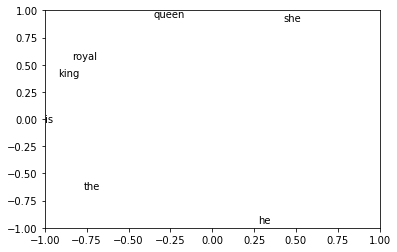

In [22]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for word in unique_words:
    print(word, vectors[word2int[word]][1])
    plt.annotate(word, xy = (vectors[word2int[word]][0],vectors[word2int[word]][1] ))
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.show()